In [49]:
import pandas as pd
import numpy as np
import sqlite3

In [50]:
df = pd.read_csv("DataCoSupplyChainDataset.csv" , encoding= 'latin1')

In [51]:
df.head(20)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [52]:
df.shape

(180519, 53)

In [53]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [57]:
df = df.drop(columns=['Order Zipcode', 'Product Description'])

In [58]:
df.dropna(subset=['Customer Lname', 'Customer Zipcode'], inplace=True)

In [59]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [60]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [61]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipping (real)       180508 non-null  int64         
 2   Days for shipment (scheduled)  180508 non-null  int64         
 3   Benefit per order              180508 non-null  float64       
 4   Sales per customer             180508 non-null  float64       
 5   Delivery Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category Id                    180508 non-null  int64         
 8   Category Name                  180508 non-null  object        
 9   Customer City                  180508 non-null  object        
 10  Customer Country               180508 non-null  object        
 11  Custo

In [63]:
df = df.drop(columns=['Product Status'])

In [64]:
df = df.drop(columns=['Product Image'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipping (real)       180508 non-null  int64         
 2   Days for shipment (scheduled)  180508 non-null  int64         
 3   Benefit per order              180508 non-null  float64       
 4   Sales per customer             180508 non-null  float64       
 5   Delivery Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category Id                    180508 non-null  int64         
 8   Category Name                  180508 non-null  object        
 9   Customer City                  180508 non-null  object        
 10  Customer Country               180508 non-null  object        
 11  Custo

In [66]:
df['Customer_name'] = df['Customer Fname'] + " " + df['Customer Lname']

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipping (real)       180508 non-null  int64         
 2   Days for shipment (scheduled)  180508 non-null  int64         
 3   Benefit per order              180508 non-null  float64       
 4   Sales per customer             180508 non-null  float64       
 5   Delivery Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category Id                    180508 non-null  int64         
 8   Category Name                  180508 non-null  object        
 9   Customer City                  180508 non-null  object        
 10  Customer Country               180508 non-null  object        
 11  Custo

In [68]:
df = df.drop(columns=['Customer Fname', 'Customer Lname'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days for shipping (real)       180508 non-null  int64         
 2   Days for shipment (scheduled)  180508 non-null  int64         
 3   Benefit per order              180508 non-null  float64       
 4   Sales per customer             180508 non-null  float64       
 5   Delivery Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category Id                    180508 non-null  int64         
 8   Category Name                  180508 non-null  object        
 9   Customer City                  180508 non-null  object        
 10  Customer Country               180508 non-null  object        
 11  Custo

In [70]:
new_names = ['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status', 'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Email', 'Customer_Id','Customer_Password', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Customer_Zipcode', 'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City', 'Order_Country','Order_Customer_Id', 'Order_Date', 'Order_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price','Order_Item_Profit_ratio','Order_Item_Quantity', 'Sales','Order_Item_Total',  'Order_Profit_Per_Order','Order_Region', 'Order_State','Order_Status', 'Product_Card_Id','Product_Category_Id', 'Product_Name','Product_Price','Shipping_Date_(DateOrders)', 'Shipping_Mode','Customer_Name']
df.columns = new_names

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days_for_shipping_(real)       180508 non-null  int64         
 2   Days_for_shipment_(scheduled)  180508 non-null  int64         
 3   Benefit_per_order              180508 non-null  float64       
 4   Sales_per_customer             180508 non-null  float64       
 5   Delivery_Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category_Id                    180508 non-null  int64         
 8   Category_Name                  180508 non-null  object        
 9   Customer_City                  180508 non-null  object        
 10  Customer_Country               180508 non-null  object        
 11  Custo

In [72]:
df = df.rename(columns={'Shipping_Date_(DateOrders)': 'Shipping_Date'})

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days_for_shipping_(real)       180508 non-null  int64         
 2   Days_for_shipment_(scheduled)  180508 non-null  int64         
 3   Benefit_per_order              180508 non-null  float64       
 4   Sales_per_customer             180508 non-null  float64       
 5   Delivery_Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category_Id                    180508 non-null  int64         
 8   Category_Name                  180508 non-null  object        
 9   Customer_City                  180508 non-null  object        
 10  Customer_Country               180508 non-null  object        
 11  Custo

In [74]:
df['Delivery_Time_Days'] = (df['Shipping_Date'] - df['Order_Date']).dt.days


print(df[['Order_Date', 'Shipping_Date', 'Delivery_Time_Days']].head())

           Order_Date       Shipping_Date  Delivery_Time_Days
0 2018-01-31 22:56:00 2018-02-03 22:56:00                   3
1 2018-01-13 12:27:00 2018-01-18 12:27:00                   5
2 2018-01-13 12:06:00 2018-01-17 12:06:00                   4
3 2018-01-13 11:45:00 2018-01-16 11:45:00                   3
4 2018-01-13 11:24:00 2018-01-15 11:24:00                   2


In [75]:
df['Total_Order_Value'] = df['Order_Item_Quantity'] * df['Order_Item_Product_Price']


print(df[['Order_Item_Quantity', 'Order_Item_Product_Price', 'Total_Order_Value']].head())

   Order_Item_Quantity  Order_Item_Product_Price  Total_Order_Value
0                    1                    327.75             327.75
1                    1                    327.75             327.75
2                    1                    327.75             327.75
3                    1                    327.75             327.75
4                    1                    327.75             327.75


In [76]:
df['Order_Profit_Margin'] = df['Order_Profit_Per_Order'] / df['Total_Order_Value']


print(df[['Order_Profit_Per_Order', 'Total_Order_Value', 'Order_Profit_Margin']].head())

   Order_Profit_Per_Order  Total_Order_Value  Order_Profit_Margin
0               91.250000             327.75             0.278413
1             -249.089996             327.75            -0.760000
2             -247.779999             327.75            -0.756003
3               22.860001             327.75             0.069748
4              134.210007             327.75             0.409489


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days_for_shipping_(real)       180508 non-null  int64         
 2   Days_for_shipment_(scheduled)  180508 non-null  int64         
 3   Benefit_per_order              180508 non-null  float64       
 4   Sales_per_customer             180508 non-null  float64       
 5   Delivery_Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category_Id                    180508 non-null  int64         
 8   Category_Name                  180508 non-null  object        
 9   Customer_City                  180508 non-null  object        
 10  Customer_Country               180508 non-null  object        
 11  Custo

**FINANCIAL ANALYSIS**

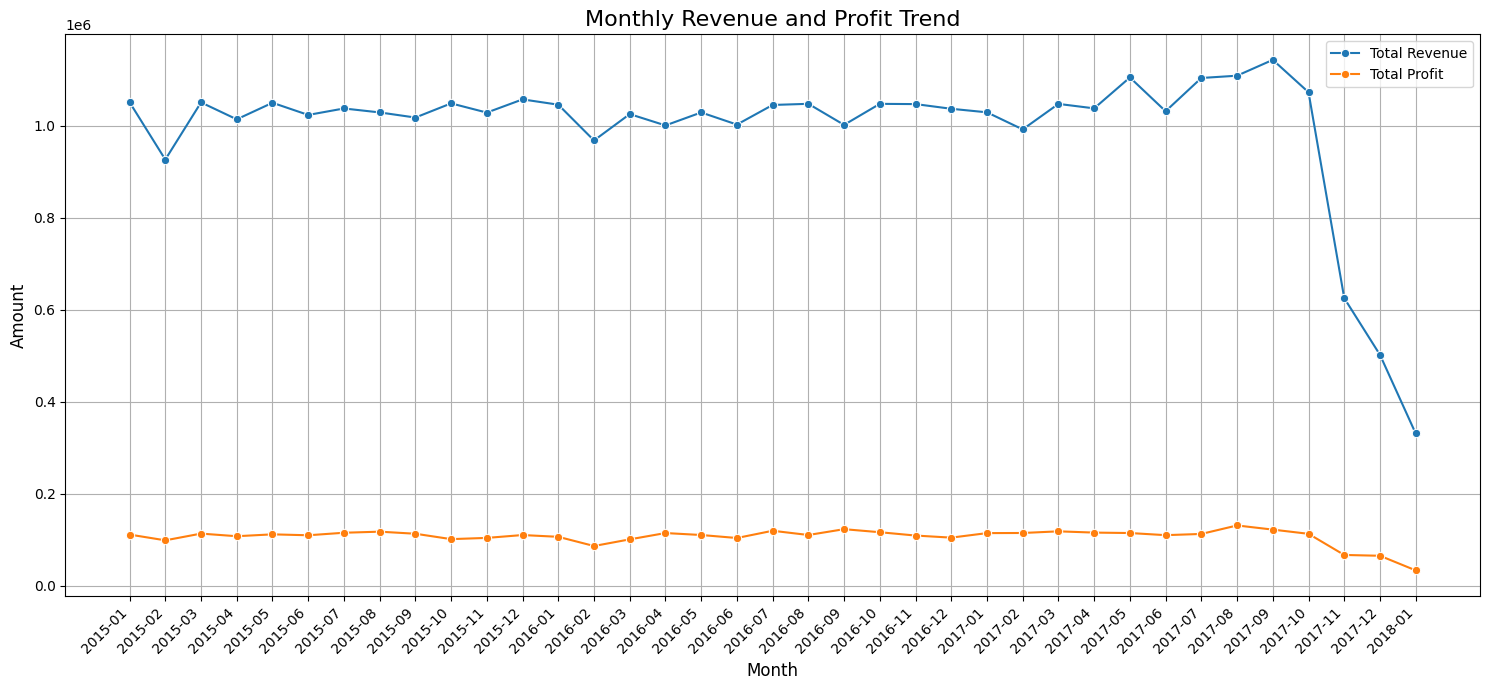

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['order_month'] = df['Order_Date'].dt.to_period('M')


monthly_trends = df.groupby('order_month').agg(
    total_revenue=('Total_Order_Value', 'sum'),
    total_profit=('Order_Profit_Per_Order', 'sum')
).reset_index()


monthly_trends['order_month'] = monthly_trends['order_month'].astype(str)


plt.figure(figsize=(15, 7))
sns.lineplot(x='order_month', y='total_revenue', data=monthly_trends, marker='o', label='Total Revenue')
sns.lineplot(x='order_month', y='total_profit', data=monthly_trends, marker='o', label='Total Profit')

plt.title('Monthly Revenue and Profit Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\mailm\AppData\Local\Temp\ipykernel_2740\1527989054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='Category_Name', data=top_10_categories, palette='viridis')


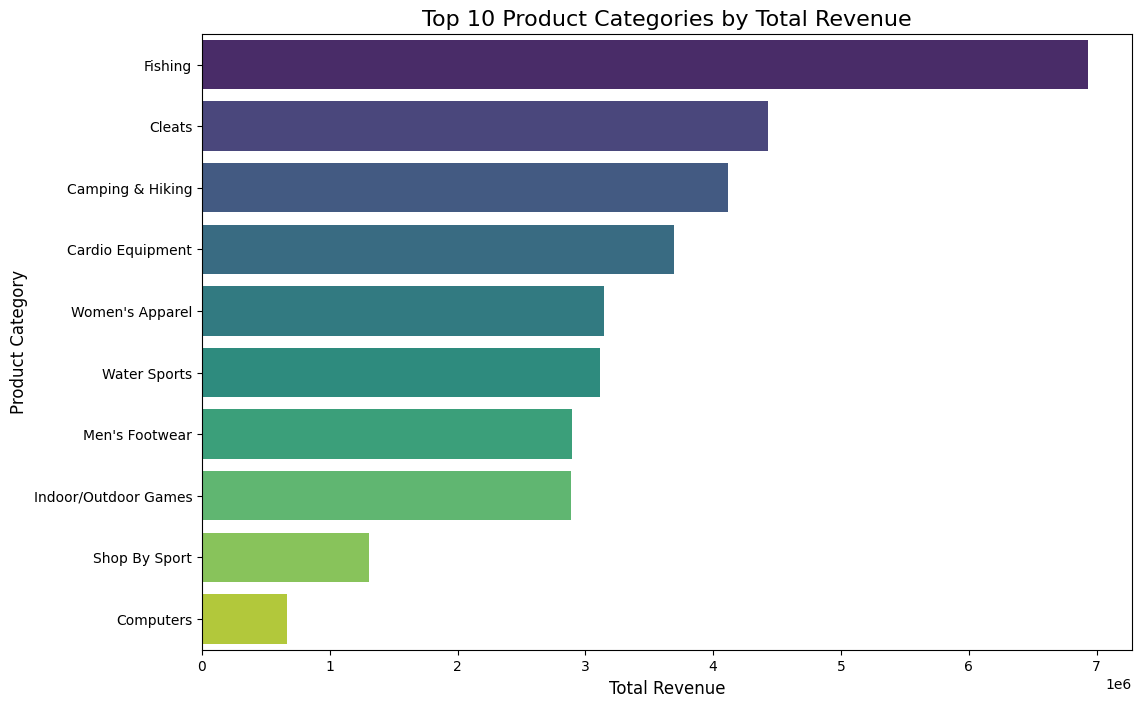

Top 10 Product Categories by Profit:
            Category_Name  total_revenue   total_profit
18               Fishing   6.929654e+06  756220.767190
12                Cleats   4.431943e+06  494636.919791
9       Camping & Hiking   4.118426e+06  427455.568106
10      Cardio Equipment   3.694843e+06  383011.098485
47       Women's Apparel   3.147800e+06  350421.029567
46          Water Sports   3.113845e+06  325146.960038
30  Indoor/Outdoor Games   2.888994e+06  318451.430554
34        Men's Footwear   2.891758e+06  311902.820214
38         Shop By Sport   1.309522e+06  129813.960315
13             Computers   6.630000e+05   69656.810171


In [79]:
category_performance = df.groupby('Category_Name').agg(
    total_revenue=('Total_Order_Value', 'sum'),
    total_profit=('Order_Profit_Per_Order', 'sum')
).reset_index()


top_10_categories = category_performance.sort_values(by='total_revenue', ascending=False).head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='Category_Name', data=top_10_categories, palette='viridis')

plt.title('Top 10 Product Categories by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


top_10_profit_categories = category_performance.sort_values(by='total_profit', ascending=False).head(10)
print("Top 10 Product Categories by Profit:\n", top_10_profit_categories)

C:\Users\mailm\AppData\Local\Temp\ipykernel_2740\2451291694.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


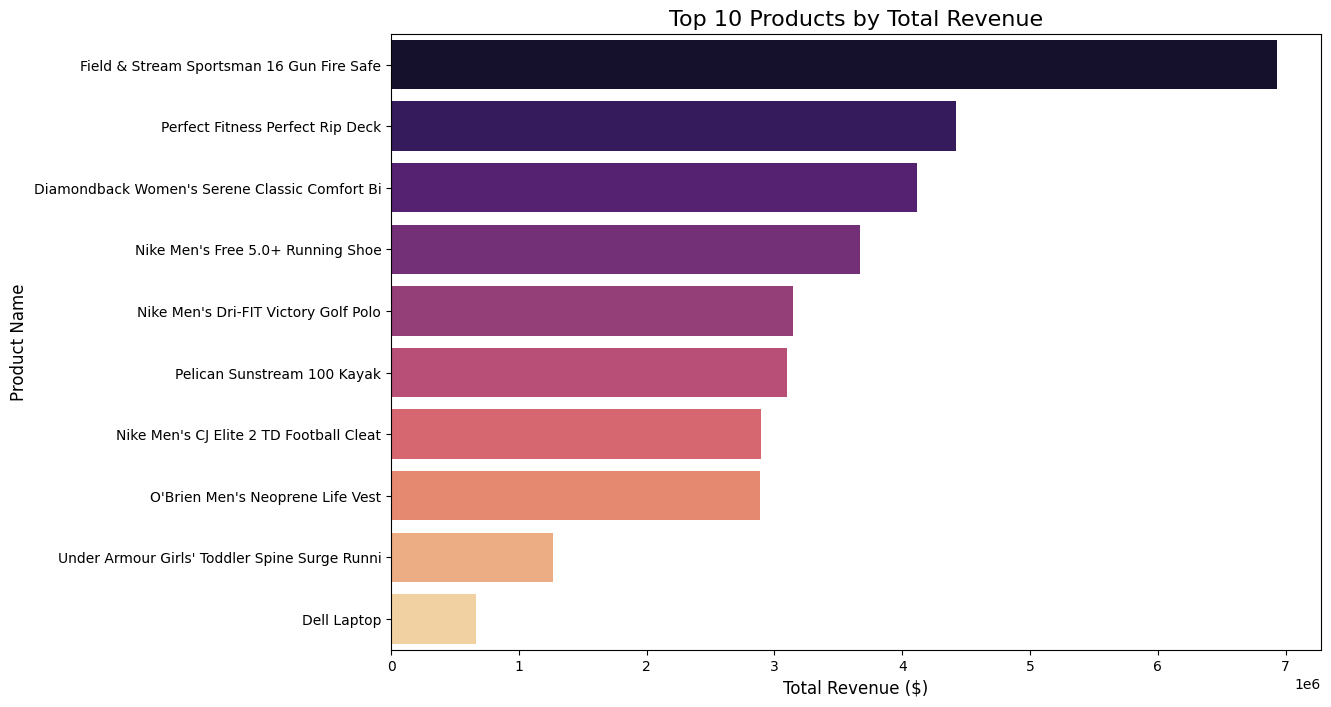

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


top_products = df.groupby('Product_Name')['Total_Order_Value'].sum().reset_index()


top_10_products = top_products.sort_values(
    by='Total_Order_Value',
    ascending=False
).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Total_Order_Value',
    y='Product_Name',
    data=top_10_products,
    palette='magma'
)

plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

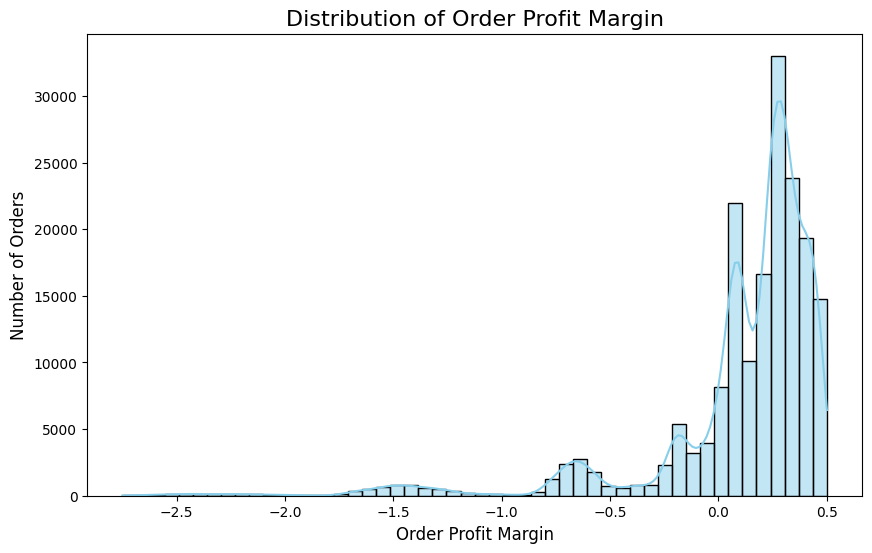

In [80]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Profit_Margin'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Order Profit Margin', fontsize=16)
plt.xlabel('Order Profit Margin', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

**LOGISTICS PERFORMANCE**

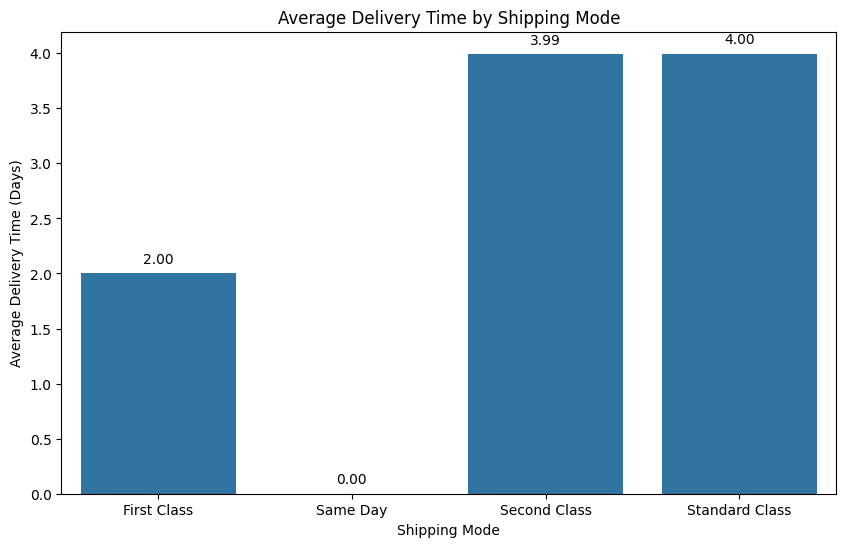

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
avg_delivery = df.groupby('Shipping_Mode')['Delivery_Time_Days'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Shipping_Mode', 
    y='Delivery_Time_Days', 
    data=avg_delivery
)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),  # format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

# Titles and labels
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delivery Time (Days)')
plt.show()


C:\Users\mailm\AppData\Local\Temp\ipykernel_2740\2228445334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


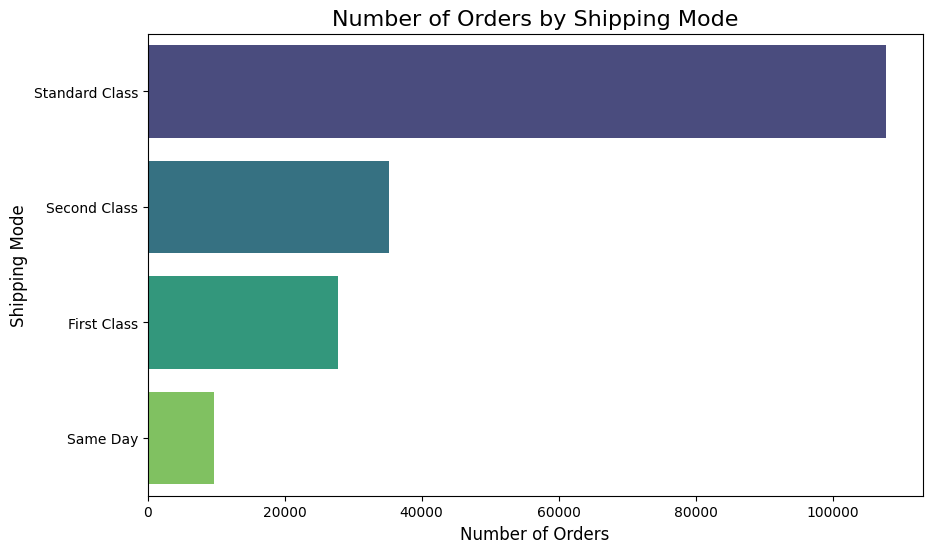

In [ ]:


shipping_mode_counts = df['Shipping_Mode'].value_counts().reset_index()
shipping_mode_counts.columns = ['Shipping_Mode', 'Number of Orders']


plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number of Orders',
    y='Shipping_Mode',
    data=shipping_mode_counts,
    palette='viridis'
)

plt.title('Number of Orders by Shipping Mode', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Shipping Mode', fontsize=12)
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days_for_shipping_(real)       180508 non-null  int64         
 2   Days_for_shipment_(scheduled)  180508 non-null  int64         
 3   Benefit_per_order              180508 non-null  float64       
 4   Sales_per_customer             180508 non-null  float64       
 5   Delivery_Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category_Id                    180508 non-null  int64         
 8   Category_Name                  180508 non-null  object        
 9   Customer_City                  180508 non-null  object        
 10  Customer_Country               180508 non-null  object        
 11  Custo

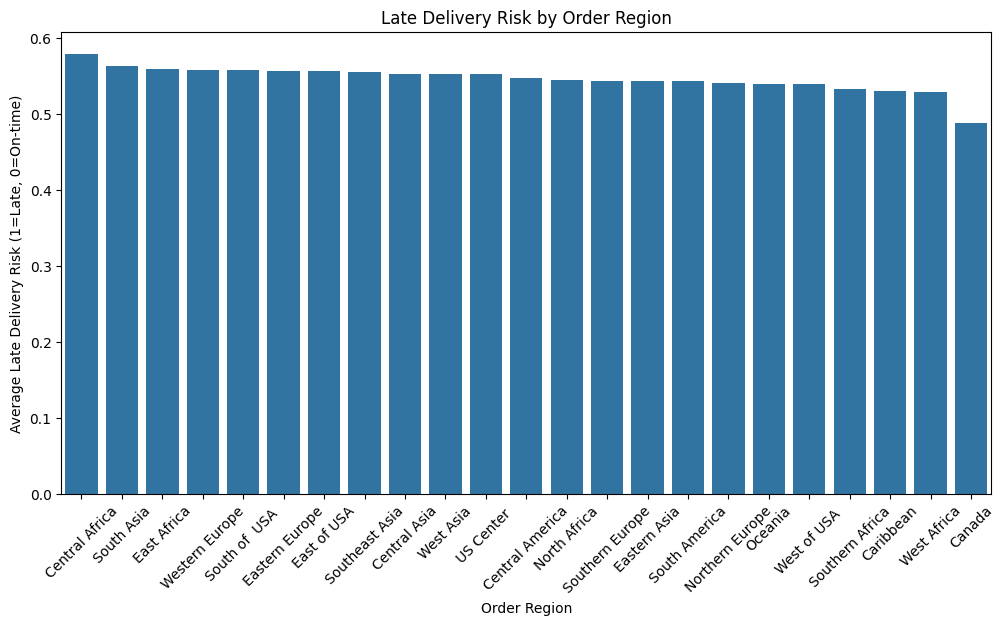

In [83]:
late_delivery_rate = df.groupby('Order_Region')['Late_delivery_risk'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Region', y='Late_delivery_risk', data=late_delivery_rate.sort_values(by='Late_delivery_risk', ascending=False))
plt.title('Late Delivery Risk by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Average Late Delivery Risk (1=Late, 0=On-time)')
plt.xticks(rotation=45)
plt.show()

**Customer and Order Behaviour**

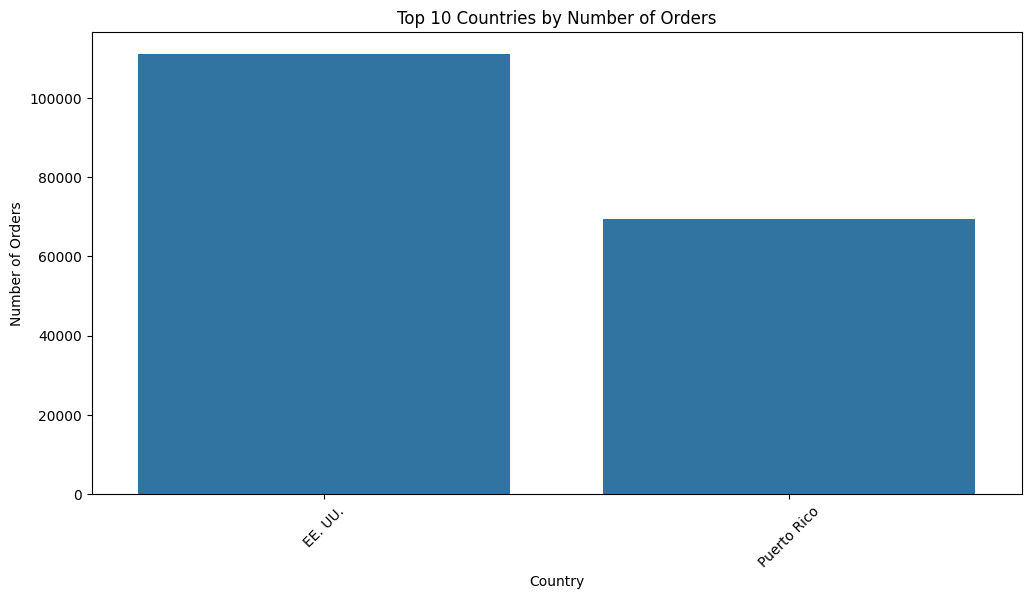

In [84]:
country_orders = df['Customer_Country'].value_counts().head(10).reset_index()
country_orders.columns = ['Country', 'Number of Orders']
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Orders', data=country_orders)
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

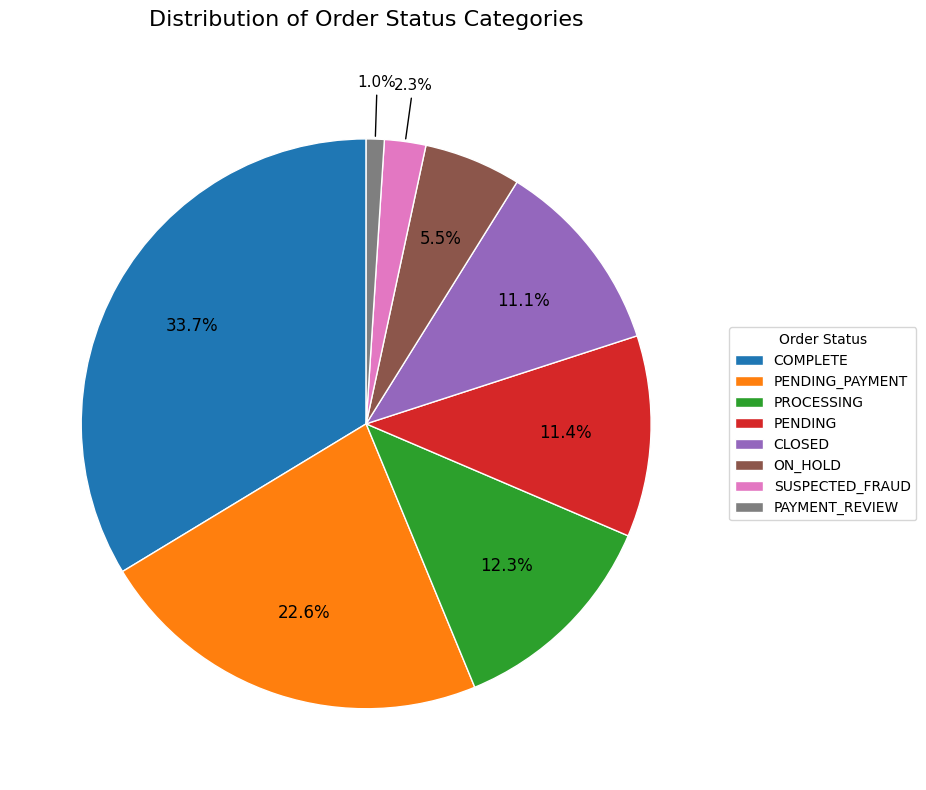

In [ ]:


data = {
    'Status': ['COMPLETE', 'PENDING_PAYMENT', 'PROCESSING', 'PENDING', 'CLOSED', 'ON_HOLD', 'SUSPECTED_FRAUD', 'PAYMENT_REVIEW'],
    'Value': [33.0, 22.1, 12.1, 11.2, 10.9, 5.4, 2.3, 1.0]
}
newdf = pd.DataFrame(data)


values = newdf['Value'].copy()
labels = newdf['Status'].copy()
total = values.sum()

fig, ax = plt.subplots(figsize=(10, 8))


wedges, texts = ax.pie(
    values,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)


for i, (wedge, value) in enumerate(zip(wedges, values)):
    pct = (value / total) * 100
    ang = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    
    if pct < 5:  
        ax.annotate(f"{pct:.1f}%",
                    xy=(x, y),
                    xytext=(1.2*x, 1.2*y),
                    ha='center', va='center',
                    fontsize=11,
                    arrowprops=dict(arrowstyle='-', lw=1))
    else:  
        ax.text(0.7*x, 0.7*y, f"{pct:.1f}%", ha='center', va='center', fontsize=12)

ax.legend(
    wedges,
    labels,
    title="Order Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Distribution of Order Status Categories", fontsize=16, pad=30)
plt.tight_layout()
plt.show()


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180508 non-null  object        
 1   Days_for_shipping_(real)       180508 non-null  int64         
 2   Days_for_shipment_(scheduled)  180508 non-null  int64         
 3   Benefit_per_order              180508 non-null  float64       
 4   Sales_per_customer             180508 non-null  float64       
 5   Delivery_Status                180508 non-null  object        
 6   Late_delivery_risk             180508 non-null  int64         
 7   Category_Id                    180508 non-null  int64         
 8   Category_Name                  180508 non-null  object        
 9   Customer_City                  180508 non-null  object        
 10  Customer_Country               180508 non-null  object        
 11  Custo

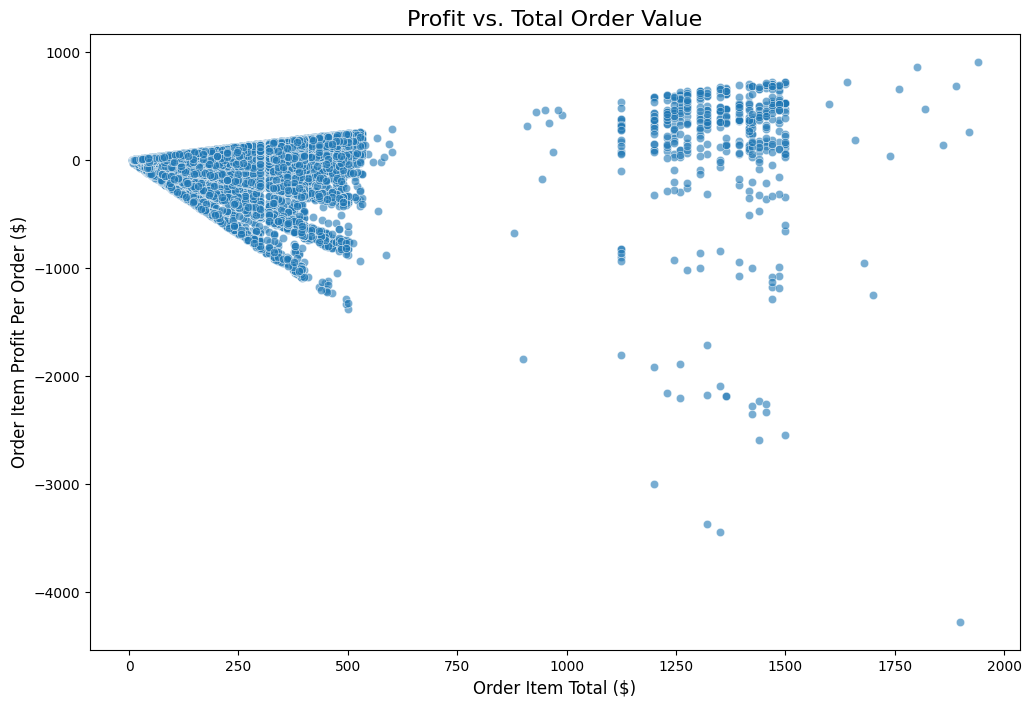

In [90]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Order_Item_Total',
    y='Order_Profit_Per_Order',
    data=df,
    alpha=0.6
)

plt.title('Profit vs. Total Order Value', fontsize=16)
plt.xlabel('Order Item Total ($)', fontsize=12)
plt.ylabel('Order Item Profit Per Order ($)', fontsize=12)
plt.show()